![](../img/b15_analysis.png)

<div style="page-break-after: always;"></div> 

# 데이터 정제 및 분석 응용

<img src="https://www.tomasbeuzen.com/python-programming-for-data-science/_static/logo.png" alt="python for data science" width="300" height="300">

1. 문자열 작업

2. 날짜 및 시간 작업

3. 계층적 인덱싱

4. 데이터프레임 시각화

5. 판다스 프로파일링

<div style="page-break-after: always;"></div> 

<h2>학습 목표<span class="tocSkip"></span></h2>

- `Series.str` 속성이 제공하는 메소드를 이용하여 판다스 문자열을 처리할 수 있다.
- 문자열 정제를 위하여 판다스에서 정규 표현식을 사용할 수 있다. 
- 판다스에서 `Timestamp`, `Timedelta`, `Period`, `DateOffset`과 같은  
  `datetime` 객체를 용도에 맞게 사용할 수 있다. 
- `pd.Timestamp()`, `pd.Period()`, `pd.date_range()`, `pd.period_range()와 같은 메소드를 써서  
  다양한 `datetime` 객체를 생성할 수 있다.  
- 부분적 문자열 인덱싱을 써서 `datetime` 인덱스를 구성할 수 있다. 
- `datetime` 자료로부터  
  `year`, `weekday`, `second` 등과 같은 다양한 시간 요소를 추출하거나,  
  시차를 적용하거나, 시간대를 변경하거나, `.resample()`로 다시 표본을 추출하는 등의  
  기본적 `datetime` 연산을 처리할 수 있다.  
- 판다스에서 `.plot` 속성을 이용하거나,  
  `pandas.plotting`이 제공하는 함수를 수입함으로써  
  기본적 차트 시각화를 작성할 수 있다. 
  
<div style="page-break-after: always;"></div>

## 1. 문자열 작업

In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 20)

- 텍스트 자료에 대한 작업은 데이터 과학에서 일상적이다.  
  판다스 `Series`와 `Index` 객체는 문자열 처리를 위한 다양한 메소드를 제공한다.  
  이에 대하여 공부해 보자. 

- 문자열 작업에 관한 공부를  
  1.1 항 `String` 자료형 공부부터 시작하자. 
  
<div style="page-break-after: always;"></div> 

### 1.1 `String` 자료형

- 문자열 자료는 판다스에서 `object` 자료형으로 표현된다.  
  - `object` 자료형은 자료형이 혼합되었거나 크기를 모르는 자료를 총괄하는 자료형이다. 
  - 문자열을 위한 전용 자료형을 제공하는 것이 더 바람직한데,  
    판다스는 `StringDtype`이란 문자열 전용 자료형을 제공한다.
  - 본 교재의 편역 시점을 기준으로 최신 판다스는 2021년 8월 15일에 배포된 1.3.2 판인데,  
    `StringDtype` 자료형은 1.0 판부터 도입되었다.   
  - 그럼에도 불구하고, (아직까지는 과거 버전에 대한 호환성때문에)  
    `object` 자료형이 여전히 문자열에 대한 기본 자료형으로 지정되어 있다. 
  - 판다스 개발팀은 `string` 자료형을 지속적으로 테스트하면서 개선하고 있는 것으로 보인다.  
    [`StringDtype`에 관한 판다스 측의 자료](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-data-types)를 참고하라. 

- 1.1 항에서 `String` 자료형을 공부했다.
- 1.2 항에서 문자열 메소드를 공부하자.
  
<div style="page-break-after: always;"></div> 

### 1.2 문자열 메소드

- 속도 향상과 사용성 강화를 위하여 넘파이나 판다스와 같은 라이브러리는  
  벡터화 연산을 아래 예제와 같이 적용하고 있다.

In [3]:
x = np.array([1, 2, 3, 4, 5])
x * 2

array([ 2,  4,  6,  8, 10])

- 그러나 문자열 배열에 대해서는 이런 벡터화 연산이 적용되지 않는다.  
  아래 예제에서 이를 확인할 수 있다:

In [4]:
x = np.array(['Tom', 'Mike', 'Tiffany', 'Joel', 'Varada'])
x.upper()

AttributeError: 'numpy.ndarray' object has no attribute 'upper'

- 문자열 배열에 대해서는 벡터화 연산이 적용되지 않기 때문에,  
  아래와 같이 컴프리헨션을 써서  
  모든 문자열 객체에 대하여 반복적으로 연산을 적용해야 한다: 


In [5]:
[name.upper() for name in x]

['TOM', 'MIKE', 'TIFFANY', 'JOEL', 'VARADA']

- 그런데 만일 문자열 배열이 결측치를 포함하고 있다면,  
  이마저도 오류를 유발한다: 

In [6]:
x = np.array(['Tom', 'Mike', None, 'Tiffany', 'Joel', 'Varada'])
[name.upper() for name in x]

AttributeError: 'NoneType' object has no attribute 'upper'

- 판다스 개발팀에서도 문자열 메소드에 대한 이와 같은 (벡터화 및 결측치) 문제에 대하여 언급하고 있다.  
  - 문자열 메소드는 판다스 `Series`나 `Index` 객체의 `.str` 속성을 통하여 접근이 가능하다. 
  - `.upper()`, `.lower()`, `.split()` 등과 같은  
    내장 문자열 메소드의 거의 대부분에 대하여 위 방법이 적용 가능하다. 

In [7]:
s = pd.Series(x)
s

0        Tom
1       Mike
2       None
3    Tiffany
4       Joel
5     Varada
dtype: object

In [8]:
s.str.upper()

0        TOM
1       MIKE
2       None
3    TIFFANY
4       JOEL
5     VARADA
dtype: object

In [9]:
s.str.split("ff", expand=True)

,0,1
0,Tom,None
1,Mike,None
2,None,None
3,Ti,any
4,Joel,None
5,Varada,None


In [10]:
s.str.len()

0    3.0
1    4.0
2    NaN
3    7.0
4    4.0
5    6.0
dtype: float64

- (수치 형태이든 열 레이블 형태이든) `index` 객체에 대해서도 이 방법이 적용 가능하다: 

In [11]:
df = pd.DataFrame(np.random.rand(5, 3),
                  columns = ['Measured Feature', 'recorded feature', 'PredictedFeature'],
                  index = [f"ROW{_}" for _ in range(5)])
df

,Measured Feature,recorded feature,PredictedFeature
ROW0,0.301447,0.775159,0.795834
ROW1,0.417821,0.002749,0.304854
ROW2,0.300703,0.996468,0.520008
ROW3,0.844131,0.533443,0.503409
ROW4,0.634959,0.575083,0.224891


In [12]:
df.columns

Index(['Measured Feature', 'recorded feature', 'PredictedFeature'], dtype='object')

In [13]:
type(df.columns)

pandas.core.indexes.base.Index

- `df`에 지정되어 있는 인덱스를 수정해 보자: 
1. 열 인덱스에서 첫 글자는 모두 대문자로 통일하고, "feature" 및 "Feature" 부분을 모두 제거 
2. "ROW"를 소문자로 변환하고, 행 번호와 문자열 사이에 `_`를 삽입

In [14]:
df.columns.str.capitalize()  # 둘째 열에 주목

Index(['Measured feature', 'Recorded feature', 'Predictedfeature'], dtype='object')

In [15]:
df.columns.str.capitalize().str.replace("feature", "")  # 1~2 열에는 뒤에 공백이 포함되었음

Index(['Measured ', 'Recorded ', 'Predicted'], dtype='object')

In [16]:
df.columns.str.capitalize().str.replace("feature", "").str.strip()

Index(['Measured', 'Recorded', 'Predicted'], dtype='object')

In [17]:
df.columns = df.columns.str.capitalize().str.replace("feature", "").str.strip()

In [18]:
df.index

Index(['ROW0', 'ROW1', 'ROW2', 'ROW3', 'ROW4'], dtype='object')

In [19]:
df.index.str.lower()

Index(['row0', 'row1', 'row2', 'row3', 'row4'], dtype='object')

In [20]:
df.index.str.lower().str.replace("w", "w_")

Index(['row_0', 'row_1', 'row_2', 'row_3', 'row_4'], dtype='object')

In [21]:
df.index = df.index.str.lower().str.replace("w", "w_")

In [22]:
df

,Measured,Recorded,Predicted
row_0,0.301447,0.775159,0.795834
row_1,0.417821,0.002749,0.304854
row_2,0.300703,0.996468,0.520008
row_3,0.844131,0.533443,0.503409
row_4,0.634959,0.575083,0.224891


- 멋지게 완성되었네요!  
  판다스의 문자열 메소드는 엄청나게 다양하다.  
  판다스가 제공하는 모든 문자열 메소드를 정리하면 다음과 같다:

| Method                     | Description                                                                                                                       |
| -------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| `Series.str.cat`           | Concatenate strings                                                                                                               |
| `Series.str.split`         | Split strings on delimiter                                                                                                        |
| `Series.str.rsplit`        | Split strings on delimiter working from the end of the string                                                                     |
| `Series.str.get`           | Index into each element (retrieve i-th element)                                                                                   |
| `Series.str.join`          | Join strings in each element of the Series with passed separator                                                                  |
| `Series.str.get_dummies`   | Split strings on the delimiter returning DataFrame of dummy variables                                                             |
| `Series.str.contains`      | Return boolean array if each string contains pattern/regex                                                                        |
| `Series.str.replace`       | Replace occurrences of pattern/regex/string with some other string or the return value of a callable given the occurrence         |
| `Series.str.repeat`        | Duplicate values (`s.str.repeat(3)` equivalent to `x * 3`)                                                                        |
| `Series.str.pad`           | "Add whitespace to left, right, or both sides of strings"                                                                         |
| `Series.str.center`        | Equivalent to `str.center`                                                                                                        |
| `Series.str.ljust`         | Equivalent to `str.ljust`                                                                                                         |
| `Series.str.rjust`         | Equivalent to `str.rjust`                                                                                                         |
| `Series.str.zfill`         | Equivalent to `str.zfill`                                                                                                         |
| `Series.str.wrap`          | Split long strings into lines with length less than a given width                                                                 |
| `Series.str.slice`         | Slice each string in the Series                                                                                                   |
| `Series.str.slice_replace` | Replace slice in each string with passed value                                                                                    |
| `Series.str.count`         | Count occurrences of pattern                                                                                                      |
| `Series.str.startswith`    | Equivalent to `str.startswith(pat)` for each element                                                                              |
| `Series.str.endswith`      | Equivalent to `str.endswith(pat)` for each element                                                                                |
| `Series.str.findall`       | Compute list of all occurrences of pattern/regex for each string                                                                  |
| `Series.str.match`         | "Call `re.match` on each element, returning matched groups as list"                                                               |
| `Series.str.extract`       | "Call `re.search` on each element, returning DataFrame with one row for each element and one column for each regex capture group" |
| `Series.str.extractall`    | "Call `re.findall` on each element, returning DataFrame with one row for each match and one column for each regex capture group"  |
| `Series.str.len`           | Compute string lengths                                                                                                            |
| `Series.str.strip`         | Equivalent to `str.strip`                                                                                                         |
| `Series.str.rstrip`        | Equivalent to `str.rstrip`                                                                                                        |
| `Series.str.lstrip`        | Equivalent to `str.lstrip`                                                                                                        |
| `Series.str.partition`     | Equivalent to `str.partition`                                                                                                     |
| `Series.str.rpartition`    | Equivalent to `str.rpartition`                                                                                                    |
| `Series.str.lower`         | Equivalent to `str.lower`                                                                                                         |
| `Series.str.casefold`      | Equivalent to `str.casefold`                                                                                                      |
| `Series.str.upper`         | Equivalent to `str.upper`                                                                                                         |
| `Series.str.find`          | Equivalent to `str.find`                                                                                                          |
| `Series.str.rfind`         | Equivalent to `str.rfind`                                                                                                         |
| `Series.str.index`         | Equivalent to `str.index`                                                                                                         |
| `Series.str.rindex`        | Equivalent to `str.rindex`                                                                                                        |
| `Series.str.capitalize`    | Equivalent to `str.capitalize`                                                                                                    |
| `Series.str.swapcase`      | Equivalent to `str.swapcase`                                                                                                      |
| `Series.str.normalize`     | Return Unicode normal form. Equivalent to `unicodedata.normalize`                                                                 |
| `Series.str.translate`     | Equivalent to `str.translate`                                                                                                     |
| `Series.str.isalnum`       | Equivalent to `str.isalnum`                                                                                                       |
| `Series.str.isalpha`       | Equivalent to `str.isalpha`                                                                                                       |
| `Series.str.isdigit`       | Equivalent to `str.isdigit`                                                                                                       |
| `Series.str.isspace`       | Equivalent to `str.isspace`                                                                                                       |
| `Series.str.islower`       | Equivalent to `str.islower`                                                                                                       |
| `Series.str.isupper`       | Equivalent to `str.isupper`                                                                                                       |
| `Series.str.istitle`       | Equivalent to `str.istitle`                                                                                                       |
| `Series.str.isnumeric`     | Equivalent to `str.isnumeric`                                                                                                     |
| `Series.str.isdecimal`     | Equivalent to `str.isdecimal`                                                                                                     |

- 문자열 치환을 위한 `df.replace()` 메소드도 알아 둘 만하다. 

In [23]:
df = pd.DataFrame({'col1': ['replace me', 'b', 'c'],
                   'col2': [1, 99999, 3]})
df

,col1,col2
0,replace me,1
1,b,99999
2,c,3


In [24]:
df.replace({'replace me': 'a',
            99999: 2})

,col1,col2
0,a,1
1,b,2
2,c,3


- 1.2 항에서 문자열 메소드를 공부했다.
- 1.3 항에서 정규 표현식을 공부하자.
  
<div style="page-break-after: always;"></div> 

### 1.3 정규 표현식

- 정규 표현식(regular expression (regex))은 탐색 패턴을 정의하는 일련의 문자열이다. 
  - 복잡한 문자열 작업을 하려면 정규 표현식을 사용할 줄 알아야 한다. 
  - 파이썬만의 고유 문법이 아니라 문자열을 처리하는 모든 곳에서 사용한다. 
  - 줄여서 '정규식'으로 쓰기도 한다. 
  - [점프 투 파이썬의 설명](https://wikidocs.net/1642)을 참고하라. 

- 정규 표현식을 입력 인자로 받아들이는 판다스 문자열 함수가 많다.  
  - 아래는 정규 표현식을 입력 인자로 받아들이는 대표적인 판다스 문자열 함수의 예이다.
  - 아래 설명에서 `re`는 정규식을 처리하는 파이썬 패키지 이름이다. 

|메소드|설명|
|---|---|
|`match()`|탐색 대상 요소마다 re.match()를 호출하고, 논리값을 반환 
|`extract()`|탐색 대상 요소마다 re.match()를 호출하고, 부합하는 그룹을 문자열로 반환 
|`findall()`|탐색 대상 요소마다 re.findall()을 호출 
|`replace()`|부합하는 패턴을 다른 문자열로 치환 
|`contains()`|탐색 대상 요소마다 re.search()를 호출하고, 논리값을 반환 
|`count()`|부합하는 패턴의 개수 
|`split()`|str.split()과 같지만, 정규 표현식을 입력 인자로 허용 
|`rsplit()`|str.rsplit()과 같지만, 정규 표현식을 입력 인자로 허용 

- 예를 들어서, `Series` 내부에서 단일 자음으로 시작하고 끝나는 모든 단어를 쉽게 탐색할 수 있다: 

In [25]:
s = pd.Series(['Tom', 'Mike', None, 'Tiffany', 'Joel', 'Varada'])
s

0        Tom
1       Mike
2       None
3    Tiffany
4       Joel
5     Varada
dtype: object

In [26]:
s.str.findall(r'^[^AEIOU].*[^aeiou]$')  # (Tom, Tiffany, Joel)만 패턴에 부합

0        [Tom]
1           []
2         None
3    [Tiffany]
4       [Joel]
5           []
dtype: object

- 직전 코드에 적용된 정규식 요소는 다음과 같다:

|요소|설명|
|---|---|
|`^`|`^` 부분은 문자열의 시작을 지정한다.|
|`[^AEIOU]`|대괄호 부분은 한 글자에 해당하는 패턴을 지정한다. <br>대괄호 내부에서 `^`를 쓰면 '부정'이라는 의미인데, <br>첫 글자가 대문자 모음('A', 'E', 'I', 'O', 및 'U')이 아니어야 한다는 의미이다. |
|`.*`|`.` 부분은 모든 문자를 의미하며, `*` 부분은 "0회 이상"이라는 의미이다. <br>따라서 문자열의 시작과 끝을 제외한 중간에 <br>어떤 문자가 몇 개 등장하더라도 문제 삼지 않겠다는 의미이다. |
|`[^aeiou]`|대괄호 부분은 한 글자에 해당하는 패턴을 지정한다. <br>대괄호 내부에서 `^`를 쓰면 '부정'이라는 의미인데, <br>마지막 글자가 소문자 모음('a', 'e', 'i', 'o', 및 'u')이 아니어야 한다는 의미이다.|
|`$`| `$` 부분은 문자열의 끝을 지정한다. |

- 직전 코드에서 `r`이라고 문자열 상수 앞에 붙은 부분은  
  가공하지 않은 원래 상태의 '생 문자열 상수(raw string literal)'라는 의미이다. 
- 아래 예제에서 일반 문자열 상수와 생 문자열 상수의 차이를 확인하라
  - 일반 문자열 상수에서는 `'\n'`이 줄바꿈 문자에 해당하는 이스케이프 코드로 처리된다. 
  - 생 문자열 상수에서는 `'\n'`이 줄바꿈 문자에 해당하는 이스케이프 코드를 무시하고 그냥 문자열로 처리된다. 


In [27]:
str = 'Hi\nHello'  # 일반 문자열 상수
print(str)

Hi
Hello


In [28]:
str = r'Hi\nHello'  # 생 문자열 상수
print(str)

Hi\nHello


- 복잡한 텍스트를 정제해야 하는 상황이라면 정규식이 마법같은 역햘을 할 수 있다.  
  자전거 데이터 집합에서 한 가지 예제를 더 살펴 보자:

In [29]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- `Comments` 열에 "Rain" 또는 "rain"이 포함된 행을 다음과 같이 탐색할 수 있다:

In [30]:
df.loc[df['Comments'].str.contains(r"[Rr]ain")]

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
"26 Sep 2019, 00:13:33",Afternoon Ride,Ride,1860,12.52,raining


- 만약 위 탐색 결과에서 "Raining"이나 "raining"을 배제하고 싶다면 다음과 같이 할 수 있다:

In [31]:
df.loc[df['Comments'].str.contains(r"^[Rr]ain$")]

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain


- `df.str.split()` 메소드를 써서 한 열의 문자열을 두 열로 분리할 수 있다. 
  - 성과 이름이 공백으로 구분되어 `df.name` 열에 저장되어 있다고 가정하면,  
    `df['name'].str.split(' ', expand=True)` 명령으로 
    성과 이름을 별도의 열로 분리할 수도 있다. 

    

  - 심지어 마침표, 쉼표 및 느낌표를 포함한 구두점을 기반으로  
    문자열을 분할하거나 새로운 열로 분리할 수도 있다:


In [32]:
df['Comments'].str.split(r"[.,!]", expand=True)

,0,1
Date,,
"10 Sep 2019, 00:13:04",Rain,None
"10 Sep 2019, 13:52:18",rain,None
"11 Sep 2019, 00:23:50",Wet road but nice weather,None
"11 Sep 2019, 14:06:19",Stopped for photo of sunrise,None
"12 Sep 2019, 00:28:05",Tired by the end of the week,None
...,...,...
"4 Oct 2019, 01:08:08",Very tired,riding into the wind
"9 Oct 2019, 13:55:40",Really cold,But feeling good
"10 Oct 2019, 00:10:31",Feeling good after a holiday break,


- 정규 표현식에 대한 모든 것을 지금 알아야 하는 것은 아니다. 
  - 향후에 문자열에 대한 복잡한 작업을 수행해야 할 상황이 되면,  
    '정규표현식을 써서 쉽게 해결할 수 있다던데!'라는 생각이 들기를 바란다. 
  - 필요할 때, 공부하면 된다. 

<div style="page-break-after: always;"></div>

- 1.3 항에서 정규 표현식을 공부했다.
- 이제 날짜/시간 조작 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

## 2. `datetime` 다루기

- 문자열에 대하여 그랬듯이,  
  판다스는 날짜 계열 데이터에 대해서도 광범위한 기능을 제공한다. 
- 2.1 항에서 `datetime` 자료형 공부부터 시작하자.

### 2.1 `datetime` 자료형

- 파이썬에 내장된 `datetime` 및 `timedelta` 모듈에 대해서 공부하자. 

In [33]:
from datetime import datetime, timedelta

In [34]:
import locale

# locale.setlocale(locale.LC_TIME,'ko_KR.UTF-8')
locale.setlocale(locale.LC_TIME)


'C'

- `datetime()`으로 `datetime` 자료형을 생성할 수 있다:

In [35]:
date = datetime(year=2005, month=7, day=9, hour=13, minute=54)
date

datetime.datetime(2005, 7, 9, 13, 54)

- `strptime()`으로 문자열 표현에서 직접 `datetime`을 생성할 수도 있다.  
  - 한글판 파이썬 공식 문서의 [날짜와 시간에 대한 형식](https://docs.python.org/ko/3/library/datetime.html#strftime-and-strptime-format-codes)을 참고하라. 
  - `strptime()`은 'string (**p**revious time)'을 의미하는데, *string* 객체를 datetime 객체로 변환한다.  

In [36]:
date = datetime.strptime("2005-07-09, 13:54", "%Y-%m-%d, %H:%M")
date

datetime.datetime(2005, 7, 9, 13, 54)

- `strftime()`으로 datetime 객체를 으로부터 특정 정보를 추출할 수 있다
  - `strftime()`은 'string (**f**orward time)'을 의미하는데, datetime 객체를 *string* 객체로 변환한다.

In [37]:
print(f"Year: {date.strftime('%Y')}")
print(f"Month: {date.strftime('%m')}")
print(f"Day: {date.strftime('%d')}")
print(f"Day name: {date.strftime('%a')}")
print(f"Day of year: {date.strftime('%j')}")
print(f"Time of day: {date.strftime('%p')}")

Year: 2005
Month: 07
Day: 09
Day name: Sat
Day of year: 190
Time of day: PM


- `timedelta()`로 특정 시각에서 일정 시간이 경과한 시각을 구하는 예제이다:

In [38]:
date + timedelta(days=7)

datetime.datetime(2005, 7, 16, 13, 54)

In [39]:
date + timedelta(weeks=1)

datetime.datetime(2005, 7, 16, 13, 54)

- 문자열에서도 그랬듯이,  
  파이썬에서 `datetime`의 배열에 대한 작업은 어렵고 비효율적이다.  
- 이러한 상황을 고려하여 넘파이에서는  
  날짜를 더 효과적으로 처리하는 새로운 datetime 객체를 제공한다:

In [40]:
dates = np.array(["2020-07-09", "2020-08-10"], dtype="datetime64")
dates

array(['2020-07-09', '2020-08-10'], dtype='datetime64[D]')

- `np.arange()`와 같은 내장 함수로 날짜 관련 배열을 생성할 수 있다:

In [41]:
dates = np.arange("2020-07", "2020-12", dtype='datetime64[M]')  # 월(M)
dates

array(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11'],
      dtype='datetime64[M]')

- 이렇게 만든 배열을 이용해서, 시간에 관련한 배열 연산을 쉽게 수행할 수 있다.  
  `datetime`의 단위와 형식에 대한 모든 사항에 대한 설명을 [이 문서에서 참고](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units)할 수 있다. 

In [42]:
dates +  np.timedelta64(2, 'M')  # 2 개월 경과하도록 배열 연산

array(['2020-09', '2020-10', '2020-11', '2020-12', '2021-01'],
      dtype='datetime64[M]')

- 넘파이가 날짜와 시각을 배열의 세상으로 데려오긴 했지만,  
  데이터 정제에서 일반적으로 필요한 과제를 수행하기에는 상당한 기능적 제약이 존재한다. 
- 부족한 부분은 판다스 라이브러리에게 의지해야 한다. 
  판다스에서는 4 종의 핵심 객체를 제공하는데, 지금부터 이를 공부한다:
  1. (np.datetime64와 유사한) Timestamp 
  2. (np.timedelta64와 유사한) Timedelta 
  3. (날짜/시각의 정규적 범위를 다루는 맞춤형 객체인) Period 
  4. (timedelta와 유사하지만 달력의 규칙을 반영한 맞춤형 객체인) DateOffset 

- 2.1 항에서 날짜/시간 자료형의 개념을 공부했다.
- 2.2 항에서 날짜/시간 자료형의 생성 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 2.2 datetime 생성

#### 2.2.1 기본적 생성 방법

보편적으로 원하는 작업은 다음과 같다:
1. `pd.Timestamp()`으로 `2005-07-09 00:00:00`와 같은 특정 시점을 생성
2. `pd.Period()`으로 `2020 Jan`과 같은 특정 기간을 생성
3. `pd.date_range()` 및 `pd.period_range()`으로 datetime 배열을 생성

In [43]:
print(pd.Timestamp('2005-07-09'))                         # 문자열로부터
print(pd.Timestamp(year=2005, month=7, day=9))            # 날짜 시각의 요소로부터
print(pd.Timestamp(datetime(year=2005, month=7, day=9)))  # datetime 객체로부터

2005-07-09 00:00:00
2005-07-09 00:00:00
2005-07-09 00:00:00


- 직전 예제에서는 특정 시점을 생성했지만,  
  아래 예제에서는 특정 기간을 생성하기 위하여 `pd.Period()`를 사용한다:

In [44]:
span = pd.Period('2005-07-09')  # 특정 날짜를 기간으로 생성
print(span)
print(span.start_time)
print(span.end_time)

2005-07-09
2005-07-09 00:00:00
2005-07-09 23:59:59.999999999


In [45]:
point = pd.Timestamp('2005-07-09 12:00')
span = pd.Period('2005-07-09')
print(f"시점: {point}")
print(f"기간: {span}")
print(f"시점이 기간에 포함되는지? {span.start_time < point < span.end_time}")

시점: 2005-07-09 12:00:00
기간: 2005-07-09
시점이 기간에 포함되는지? True


- 때로는 단일 값이 아니라 datetime의 배열을 생성하고 싶다.  
  datetime의 배열은 `DatetimeIndex`/`PeriodIndex`/`TimedeltaIndex` 클래스에 해당한다:

In [46]:
pd.date_range('2020-09-01 12:00',
              '2020-09-11 12:00',
              freq='D')

DatetimeIndex(['2020-09-01 12:00:00', '2020-09-02 12:00:00',
               '2020-09-03 12:00:00', '2020-09-04 12:00:00',
               '2020-09-05 12:00:00', '2020-09-06 12:00:00',
               '2020-09-07 12:00:00', '2020-09-08 12:00:00',
               '2020-09-09 12:00:00', '2020-09-10 12:00:00',
               '2020-09-11 12:00:00'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.period_range('2020-09-01',
                '2020-09-11',
                freq='D')

PeriodIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
             '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
             '2020-09-09', '2020-09-10', '2020-09-11'],
            dtype='period[D]')

- `Timedelta` 객체를 써서 시간에 대한 덧셈이나 뺄셈을 처리할 수 있다: 

In [48]:
pd.date_range('2020-09-01 12:00', '2020-09-11 12:00', freq='D') + pd.Timedelta('1.5 hour')

DatetimeIndex(['2020-09-01 13:30:00', '2020-09-02 13:30:00',
               '2020-09-03 13:30:00', '2020-09-04 13:30:00',
               '2020-09-05 13:30:00', '2020-09-06 13:30:00',
               '2020-09-07 13:30:00', '2020-09-08 13:30:00',
               '2020-09-09 13:30:00', '2020-09-10 13:30:00',
               '2020-09-11 13:30:00'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range('2020-09-01 12:00', '2020-09-11 12:00', freq='D') + pd.Timedelta('1.9 hour')

DatetimeIndex(['2020-09-01 13:54:00', '2020-09-02 13:54:00',
               '2020-09-03 13:54:00', '2020-09-04 13:54:00',
               '2020-09-05 13:54:00', '2020-09-06 13:54:00',
               '2020-09-07 13:54:00', '2020-09-08 13:54:00',
               '2020-09-09 13:54:00', '2020-09-10 13:54:00',
               '2020-09-11 13:54:00'],
              dtype='datetime64[ns]', freq='D')

- 마지막으로, 판다스는 결측치를 `NaT`로 표시하는데, 이는 `np.nan`과 유사한 것이다: 

In [50]:
pd.Timestamp(pd.NaT)

NaT

- 2.2.1 목에서 날짜/시간 자료형의 기본적 생성 방법을 공부했다.
- 2.2.2 목에서 기존 자료를 날짜/시간 자료형으로 변환하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

#### 2.2.2 기존 자료의 변환

- 일상적으로 날짜는 문자열 배열로 존재한다.  
  `pd.to_datetime()`을 써서 이를 datetime으로 변환할 수 있다:

In [51]:
string_dates = ['July 9, 2020', 'August 1, 2020', 'August 28, 2020']  # 영문 문자열의 배열
string_dates

['July 9, 2020', 'August 1, 2020', 'August 28, 2020']

In [52]:
pd.to_datetime(string_dates)

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

In [53]:
string_dates = ['2020-07-09', '2020-08-01', '2020-08-29']             # 국문 문자열의 배열
string_dates

['2020-07-09', '2020-08-01', '2020-08-29']

In [54]:
pd.to_datetime(string_dates)

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-29'], dtype='datetime64[ns]', freq=None)

- 더 복잡한 datetime 형식에 대해서는, [한글판 파이썬 공식 문서의 자료](https://docs.python.org/ko/3/library/datetime.html#strftime-and-strptime-format-codes)를 참고하라:

In [55]:
string_dates = ['2020 9 July', '2020 1 August', '2020 28 August']  
print(pd.to_datetime(string_dates, format="%Y %d %B"))   # 사실 format 인자 생략해도 무방함
print(pd.to_datetime(string_dates))                      # 사실 format 인자 생략해도 무방함

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)


- 아니면 사전을 이용한다:

In [56]:
dict_dates = pd.to_datetime({"year": [2020, 2020, 2020],
                             "month": [7, 8, 8],
                             "day": [9, 1, 28]})  # 인덱스가 아니라 시리즈!
dict_dates

0   2020-07-09
1   2020-08-01
2   2020-08-28
dtype: datetime64[ns]

In [57]:
pd.Index(dict_dates)

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

- 2.2.2 목에서 기존 자료를 날짜/시간 자료형으로 변환하는 방법을 공부했다.
- 2.2.3 목에서 외부 원천으로부터 날짜/시간 자료를 입력하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

#### 2.2.3 외부 원천으로부터 직접 입력

- 자전거 출근 데이터 집합으로부터 입력을 연습해 보자:

In [58]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 현 시점에서 인덱스 상황은 다음과 같다.  
  - `df.index.dtype`로 확인하면,   
    `string` 데이터로 가득 찬 `object` 자료형이다. 
  - `type(df.index)`로 확인하면,  
    `pandas.core.indexes.base.Index`으로서, 평범한 전통적 인덱스이다.

In [59]:
print(df.index.dtype)
type(df.index)

object


pandas.core.indexes.base.Index

- `pd.to_datetime()`을 써서 이러한 인덱스를 datetime으로 강제 변환할 수 있다. 
- 하지만 더 좋은 방법이 있는데,  
  `pd.read_csv()`의 `parse_dates`라는 인자를 써서  
  파일을 읽어들이는 과정에서 이를 자동적으로 처리하는 것이다:

In [60]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 이제 인덱스 상황은 다음과 같이 변화하였다.  
  - `df.index.dtype`로 확인하면,  
    `object`에서 `datetime64[ns]`로 변화되었다.  
  - `type(df.index)`로 확인하면,  
    `pandas.core.indexes.base.Index`에서 `pandas.core.indexes.datetimes.DatetimeIndex`로 변화되었다.

In [61]:
print(df.index.dtype)
type(df.index)

datetime64[ns]


pandas.core.indexes.datetimes.DatetimeIndex

- `parse_dates` 인자는 매우 유연하여, 해석하기 난해한 datetime 형식도 지정이 가능하다. 
- `date_parser`, `dayfirst` 등과 같은 관련 인자도 쓸 수 있으니, [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)을 확인해 보라. 

- 2.2 항에서 날짜/시간 자료형을 생성하는 3종 방법을 공부했다.
- 2.3 항에서 날짜/시간 자료를 인덱싱하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 2.3 datetime 인덱싱

- datetime 인덱스 객체도 정규 Index 객체와 유사하게,  
  선택, 슬라이싱, 필터링 등이 가능하다. 

In [62]:
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 부분적인 스트링 인덱싱을 다음과 같이 수행할 수 있다:

In [63]:
df.loc['2019-09']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-09-25 13:35:41,Morning Ride,Ride,2124,12.65,Stopped for photo of sunrise
2019-09-26 00:13:33,Afternoon Ride,Ride,1860,12.52,raining
2019-09-26 13:42:43,Morning Ride,Ride,2350,12.91,Detour around trucks at Jericho


- 완전 매칭:

In [64]:
df.loc['2019-10-10']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
2019-10-10 13:47:14,Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


In [65]:
df.loc['2019-10-10 13:47:14']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-10 13:47:14,Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


- 슬라이싱:

In [67]:
# df.loc['2019-10-01':'2019-10-13']             # 원저의 코드는 미래 경고를 유발함 
df.sort_index().loc['2019-10-01':'2019-10-13']  

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-01 00:15:07,Afternoon Ride,Ride,1732,NaN,Legs feeling strong!
2019-10-01 13:45:55,Morning Ride,Ride,2222,12.82,Beautiful morning! Feeling fit
2019-10-02 00:13:09,Afternoon Ride,Ride,1756,NaN,A little tired today but good weather
2019-10-02 13:46:06,Morning Ride,Ride,2134,13.06,Bit tired today but good weather
2019-10-03 00:45:22,Afternoon Ride,Ride,1724,12.52,Feeling good
2019-10-03 13:47:36,Morning Ride,Ride,2182,12.68,Wet road
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- `df.between_time()`를 쓰면 두 시각 사이의 모든 데이터를 검색할 수 있다:

In [66]:
df.between_time('00:00', '01:00')

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
2019-09-17 00:15:47,Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
2019-09-18 00:15:52,Afternoon Ride,Ride,2101,12.48,Pumped up tires
2019-09-19 00:30:01,Afternoon Ride,Ride,48062,12.48,Feeling good
2019-09-24 00:35:42,Afternoon Ride,Ride,2076,12.47,"Oiled chain, bike feels smooth"
2019-09-25 00:07:21,Afternoon Ride,Ride,1775,12.10,Feeling really tired
2019-09-26 00:13:33,Afternoon Ride,Ride,1860,12.52,raining


- 더 복잡한 필터링을 위해서는, 시계열(timeserie) 분할이 필요한데,  
  이에 대해서는 다음 절에서 공부한다.

- 2.3 항에서 날짜/시간 자료를 인덱싱하는 방법을 공부했다. 
- 2.4 항에서 날짜/시간 자료를 처리하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 2.4 datetime 처리

#### 2.4.1 분할

- 시계열 분할에 의하여 시간과 날짜에 관한 구성 요소를 분해할 수 있다.  
  [구성 요소를 정의하는 많은 속성](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components)이 있다. 

In [67]:
df.index.year  # 연도

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Date')

In [68]:
df.index.second  # 초

Int64Index([ 4, 18, 50, 19,  5, 48, 47, 34, 53, 52,  1,  9,  5, 41, 42, 24, 21,
            41, 33, 43, 18, 52,  7, 55,  9,  6, 22, 36,  8, 40, 31, 14, 57],
           dtype='int64', name='Date')

In [69]:
df.index.weekday  # 요일(월요일=0, 일요일=6)

Int64Index([1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 3, 4, 0, 1, 1, 2, 2, 3, 3, 4, 0,
            1, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4],
           dtype='int64', name='Date')

In [70]:
요일 = ['월', '화', '수', '목', '금', '토', '일']
[요일[_] for _ in df.index.weekday]


['화',
 '화',
 '수',
 '수',
 '목',
 '월',
 '화',
 '화',
 '수',
 '수',
 '목',
 '목',
 '금',
 '월',
 '화',
 '화',
 '수',
 '수',
 '목',
 '목',
 '금',
 '월',
 '화',
 '화',
 '수',
 '수',
 '목',
 '목',
 '금',
 '수',
 '목',
 '목',
 '금']

- 속성뿐만이 아니라 메소드도 사용할 수 있다:

In [71]:
df.index.day_name()  # 요일

Index(['Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Thursday', 'Monday',
       'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Thursday', 'Thursday',
       'Friday', 'Monday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday',
       'Thursday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Tuesday',
       'Wednesday', 'Wednesday', 'Thursday', 'Thursday', 'Friday', 'Wednesday',
       'Thursday', 'Thursday', 'Friday'],
      dtype='object', name='Date')

In [72]:
df.index.month_name()  # 월 이름

Index(['September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'October', 'October', 'October', 'October',
       'October', 'October', 'October', 'October', 'October', 'October',
       'October'],
      dtype='object', name='Date')

- DatetimeIndex 객체가 아닌 Series에 대해서 작업한다면, `.dt` 속성을 통해서 처리가 가능하다:

In [73]:
s = pd.Series(pd.date_range('2011-12-29', '2011-12-31'))
s.year  # 이렇게 해서는 오류가 발생함

AttributeError: 'Series' object has no attribute 'year'

In [74]:
s.dt.year  # 이렇게 해야 작동함

0    2011
1    2011
2    2011
dtype: int64

- 2.4.1 목에서 날짜/시간 자료를 분할하는 방법을 공부했다. 
- 2.4.2 목에서 시차 및 시간대를 처리하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

#### 2.4.2 시차 및 시간대

- 앞에서 `Timedelta`를 써서 특정 날짜와 시각에 대한  
  덧셈/뺄셈을 수행하는 방법을 살펴 보았다. 
  - `Timedelta`는 절대 시간을 준용하는데,  
    이렇게 하면 시간이 정규적이지 않은 일부 지역의 경우에는 문제가 될 수 있다.   
  - 예를 들어서 캐나다에서는 3월 8일에 일광 절약 시간제가 시작되는데,  
    이때는 시계를 **한 시간 앞으로** 조정한다.  
  - 이런 '달력 상의 시간' 문제는 절대 시간을 준용하는 `Timedelta`에서는 처리가 어렵다. 

In [75]:
t1 = pd.Timestamp('2020-03-07 12:00:00', tz='Canada/Pacific')  # tz 지정
t2 = t1 + pd.Timedelta("1 day")
print(f"t1: {t1}")
print(f"t2: {t2}")  # 시간이 12:00 -> 13:00로 변경됨

t1: 2020-03-07 12:00:00-08:00
t2: 2020-03-08 13:00:00-07:00


- 대신에 `Dateoffset`을 사용할 수 있다:

In [76]:
t3 = t1 + pd.DateOffset(days=1)
print(f"t1: {t1}")
print(f"t3: {t3}")  # 시각이 12:00에 머물러 있음

t1: 2020-03-07 12:00:00-08:00
t3: 2020-03-08 12:00:00-07:00


- 앞선 예제에는 시간대(timezone) 정보가 포함되었다. 
    - 기본적으로 datetime 객체는 시간대를 구별하지 않는다.  
    - 시간대를 지정하려면 `tz` 인수를 지정하거나,  
      `tz_localize()` 메소드를 사용해야 한다:

In [77]:
print(f"        No timezone: {pd.Timestamp('2020-03-07 12:00:00').tz}")
print(f"             tz arg: {pd.Timestamp('2020-03-07 12:00:00', tz='Canada/Pacific').tz}")
print(f".tz_localize method: {pd.Timestamp('2020-03-07 12:00:00').tz_localize('Canada/Pacific').tz}")

        No timezone: None
             tz arg: Canada/Pacific
.tz_localize method: Canada/Pacific


- `.tz_convert()` 메소드로 시간대를 변환할 수 있다.  
  아마도 자전거 출퇴근 데이터의 시간이 조금 이상하다는 것을 눈치챘을 것이다.:

In [78]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 자정 무렵에 출근했을리는 없다.  
  - 이 데이터의 시간대 설정은 오류가 있다. 
  - 이 데이터는 캐나다 시간을 호주 시간으로 변환해서 기록한 것이다. 
  - 잘못된 시간대를 수정해 보자:

In [79]:
df.index = df.index.tz_localize("Canada/Pacific")   # 캐나다 시간대로 지정  
df  # 자정이 오후로, 한낮이 아침으로 잘못 표시됨

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04-07:00,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18-07:00,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50-07:00,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19-07:00,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05-07:00,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08-07:00,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40-07:00,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31-07:00,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


In [80]:
df.index = df.index.tz_convert("Australia/Sydney")  # 호주 시간대로 변환
df  # 오후와 아침이 시각과 일치함

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 17:13:04+10:00,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-11 06:52:18+10:00,Morning Ride,Ride,2531,13.03,rain
2019-09-11 17:23:50+10:00,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-12 07:06:19+10:00,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 17:28:05+10:00,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 18:08:08+10:00,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-10 07:55:40+11:00,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 18:10:31+11:00,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 만일 적용해야 하는 시차(offset)를 알고 있다면, 이 경우에는 7 시간인데,  
  `DateOffset`을 사용할 수 있다:

In [81]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True)
df.index = df.index + pd.DateOffset(hours=-7)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-09 17:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 06:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-10 17:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 07:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-11 17:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-03 18:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 06:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-09 17:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


- 2.4.2 목에서 시차 및 시간대를 처리하는 방법을 공부했다. 
- 2.4.3 목에서 재추출 및 집계를 처리하는 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

#### 2.4.3 재추출 및 집계

- 시계열 데이터에서 자주 사용하는 작업으로 재추출(resampling)이 있는데,  
  이는 시계열 데이터의 시간 간격을 넓게 또는 좁게 조정하여 다시 집계(aggregating)하는 것이다. 
- 예를 들자면, `.resample()` 메소드를 써서  
  일별 데이터를 주별 데이터로 재추출하는 것이다. 
- [재추출 및 집계에 관한 한글 자료](https://rfriend.tistory.com/494)를 참고하라. 
- 아래에서는 자전거 출퇴근 시계열 데이터를 1일 주기의 시계열 데이터로 재추출하여 집계해보자:

In [82]:
df.index

DatetimeIndex(['2019-09-09 17:13:04', '2019-09-10 06:52:18',
               '2019-09-10 17:23:50', '2019-09-11 07:06:19',
               '2019-09-11 17:28:05', '2019-09-16 06:57:48',
               '2019-09-16 17:15:47', '2019-09-17 06:43:34',
               '2019-09-18 06:49:53', '2019-09-17 17:15:52',
               '2019-09-18 17:30:01', '2019-09-19 06:52:09',
               '2019-09-19 18:02:05', '2019-09-23 06:50:41',
               '2019-09-23 17:35:42', '2019-09-24 06:41:24',
               '2019-09-24 17:07:21', '2019-09-25 06:35:41',
               '2019-09-25 17:13:33', '2019-09-26 06:42:43',
               '2019-09-26 18:00:18', '2019-09-30 06:53:52',
               '2019-09-30 17:15:07', '2019-10-01 06:45:55',
               '2019-10-01 17:13:09', '2019-10-02 06:46:06',
               '2019-10-02 17:45:22', '2019-10-03 06:47:36',
               '2019-10-03 18:08:08', '2019-10-09 06:55:40',
               '2019-10-09 17:10:31', '2019-10-10 06:47:14',
               '2019-10-

In [83]:
df.resample("1D")  ## 하루 주기로 재추출

- `resample` 객체는 지난 장에서 공부했던 `groupby` 객체와 매우 비슷하다.  
  `groupby` 객체에서 했던 것처럼,  
  재추출을 통해 주기가 조정되어 그룹핑된 시계열 데이터에 대하여  
  집계 함수를 적용해야 한다: 

In [84]:
dfr = df.resample("1D").mean()
dfr

,Time,Distance
Date,,
2019-09-09,2084.0,12.620
2019-09-10,2197.0,12.775
2019-09-11,2041.5,12.660
2019-09-12,NaN,NaN
2019-09-13,NaN,NaN
...,...,...
2019-10-06,NaN,NaN
2019-10-07,NaN,NaN
2019-10-08,NaN,NaN


- `NaN`이 꽤 많이 보인다. 
  주말이나 휴일에는 출근하지 않았다. 

In [85]:
dfr['Weekday'] = dfr.index.day_name()
dfr.head(10)

,Time,Distance,Weekday
Date,,,
2019-09-09,2084.0,12.620,Monday
2019-09-10,2197.0,12.775,Tuesday
2019-09-11,2041.5,12.660,Wednesday
2019-09-12,NaN,NaN,Thursday
2019-09-13,NaN,NaN,Friday
2019-09-14,NaN,NaN,Saturday
2019-09-15,NaN,NaN,Sunday
2019-09-16,2122.5,12.450,Monday
2019-09-17,2193.0,12.540,Tuesday


In [86]:
days = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

dfr['NumberOfWeekday'] = dfr.index.dayofweek
dfr['요일'] = dfr['NumberOfWeekday'].apply(lambda x: days[x])
dfr.head(10)

,Time,Distance,Weekday,NumberOfWeekday,요일
Date,,,,,
2019-09-09,2084.0,12.620,Monday,0,월
2019-09-10,2197.0,12.775,Tuesday,1,화
2019-09-11,2041.5,12.660,Wednesday,2,수
2019-09-12,NaN,NaN,Thursday,3,목
2019-09-13,NaN,NaN,Friday,4,금
2019-09-14,NaN,NaN,Saturday,5,토
2019-09-15,NaN,NaN,Sunday,6,일
2019-09-16,2122.5,12.450,Monday,0,월
2019-09-17,2193.0,12.540,Tuesday,1,화


- 판다스는 업무 시간(business time) 개념을 지원하며,  
  앞서 본 모든 시계열 함수에서 업무 시간 관련 형식 코드를 지원한다. 
- 주말을 건너 띄는 업무 요일 개념을 살펴보자: 

In [87]:
friday = pd.Timestamp("2018-01-05")
saturday = friday + pd.Timedelta("1 day")  # add 1 day
monday = friday + pd.offsets.BDay()        # add 1 business day
saturday.day_name(), monday.day_name()

('Saturday', 'Monday')

In [88]:
dfr = df.resample("1B").mean()  # "B" is business day
dfr['Weekday'] = dfr.index.day_name()  # 평일만 집계됨
dfr.head(10)

,Time,Distance,Weekday
Date,,,
2019-09-09,2084.0,12.620,Monday
2019-09-10,2197.0,12.775,Tuesday
2019-09-11,2041.5,12.660,Wednesday
2019-09-12,NaN,NaN,Thursday
2019-09-13,NaN,NaN,Friday
2019-09-16,2122.5,12.450,Monday
2019-09-17,2193.0,12.540,Tuesday
2019-09-18,25482.5,13.525,Wednesday
2019-09-19,2525.5,12.700,Thursday


- 지금까지 날짜/시간 처리 방법을 공부했다.  
  - 날짜/시간 분할
  - 시차 및 시간대 
  - 재추출 및 집계
- 이제부터 계층적 인덱싱을 공부하자. 
  
<div style="page-break-after: always;"></div> 

## 3. 계층적 인덱싱

- 계층적 인덱싱, 다중 인덱싱 또는 적층식 인덱싱은 판다스가 데이터를 중첩시키는 방식이다.  
  이는 다차원 데이터의 저장 구조를 이차원 데이터프레임에서 보여주는 방식이다. 

|![그림 1. 뒤엉켜서 노는 판다들](../img/chapter9/pandas_stacking.gif)<br>그림 1. 그림 1. 뒤엉켜서 노는 판다들<br>출처: [Giphy](https://giphy.com/gifs/panda-playing-QoCoLo2opwUW4)|
|:---|

### 3.1 계층적 인덱스 생성

- 동기 유발을 위한 예제부터 살펴 보자.  
  세 교수가 2019~2020년에 해마다 담당한 강좌 수를 판다스 시리즈에 저장한다고 가정하자. 
- 적당한 인덱스를 (교수, 연도) 형태의 튜플로 만들 수 있다: 

In [89]:
index = [('Tom', 2019), ('Tom', 2020),          # 인덱스 
         ('Mike', 2019), ('Mike', 2020),
         ('Tiffany', 2019), ('Tiffany', 2020)]
courses = [4, 6, 5, 5, 6, 3]                    # 강좌 수
s = pd.Series(courses, index)
s

(Tom, 2019)        4
(Tom, 2020)        6
(Mike, 2019)       5
(Mike, 2020)       5
(Tiffany, 2019)    6
(Tiffany, 2020)    3
dtype: int64

- 이 시리즈에 대한 인덱싱 혹은 슬라이싱 예제는 다음과 같다: 

In [90]:
s.loc[("Tom", 2019):("Tom", 2019)]

(Tom, 2019)    4
dtype: int64

In [91]:
s.loc[("Tom", 2019):("Tom", 2020)]

(Tom, 2019)    4
(Tom, 2020)    6
dtype: int64

In [92]:
s.loc[("Tom", 2019):("Mike", 2019)]

(Tom, 2019)     4
(Tom, 2020)     6
(Mike, 2019)    5
dtype: int64

- 그런데, 2019년도의 해당 값만 확인하려면, 복잡한 반복 처리가 필요하다:

In [93]:
s[[i for i in s.index if i[1] == 2019]]

(Tom, 2019)        4
(Mike, 2019)       5
(Tiffany, 2019)    6
dtype: int64

- 이 문제를 해결하는 더 좋은 방법은 다중 인덱스(또는 계층적 인덱스)를 쓰는 것이다.  
  - `pd.MultiIndex.from_tuple()`를 써서 다중 인덱스를 생성할 수 있다. 
  - `.from_X`와 같은 [다양한 변형 방법](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html)도 있지만, 튜플을 쓰는 것이 일반적인 방법이다. 

In [94]:
mi = pd.MultiIndex.from_tuples(index)  # 우선 다중 인덱스를 생성
mi

MultiIndex([(    'Tom', 2019),
            (    'Tom', 2020),
            (   'Mike', 2019),
            (   'Mike', 2020),
            ('Tiffany', 2019),
            ('Tiffany', 2020)],
           )

In [95]:
s = pd.Series(courses, mi)            # 다중 인덱스로 시리즈를 생성
s

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

- 이제 다중 인데스를 써서 더 효율적이고 논리적인 인덱싱이 가능하다:

In [96]:
s.loc['Tom']

2019    4
2020    6
dtype: int64

In [97]:
s.loc[:, 2019]

Tom        4
Mike       5
Tiffany    6
dtype: int64

In [98]:
s.loc["Tom", 2019]

4

- 반복 가능한 집합체(예를 들면 리스트의 리스트)를 `index` 인자에 전달하여 다중 인덱스를 생성할 수도 있지만,  
  이런 방법보다는 `pd.MultIndex`를 활용하는 방법이 더욱 명쾌하고 직관적이다:

In [99]:
index = [['Tom', 'Tom', 'Mike', 'Mike', 'Tiffany', 'Tiffany'],
         [2019, 2020, 2019, 2020, 2019, 2020]]   # 리스트의 리스트로 인덱스 생성
courses = [4, 6, 5, 5, 6, 3]
s = pd.Series(courses, index)
s

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

- 3.1 항에서 계층적 인덱스 생성 방법을 공부했다. 
- 3.2 항에서 stack/unstack 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 3.2 `stack` / `unstack`

- 앞서 다중 인데스 시리즈로 만든 예제를 데이터프레임으로 처리할 수도 있다.  
  판다스에서는 이런 접근을 위해서 `.stack()`과 `.unstack()` 메소드를 제공하는데,  
  이를 통하여 데이터프레임에서 다중 인덱스 시리즈로, 또는 그 역으로 전환할 수 있다: 
 

In [100]:
s                 # 다중 인덱스 시리즈

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

In [101]:
s = s.unstack()   # 데이터프레임으로 전환 
s

,2019,2020
Mike,5,5
Tiffany,6,3
Tom,4,6


In [102]:
s.stack()         # 다중 인덱스 시리즈로 전환

Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
Tom      2019    4
         2020    6
dtype: int64

- 3.2 항에서 stack/unstack 방법을 공부했다. 
- 3.3 항에서 계층적 인덱스 활용 방법을 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 3.3 계층적 인덱스 활용

- (다중 인덱스 <-> 데이터프레임) 간의 전환을 보고 있자면, 다중 인덱스가 도대체 왜 필요한지 의문이 든다.  
  앞에서 우리는 단지 이차원 데이터만을 다루었는데,  
  다중 인덱스는 데이터의 차원이 더 늘어나더라도 사용할 수가 있기 때문이다:

In [103]:
index = [['Tom', 'Tom', 'Mike', 'Mike', 'Tiffany', 'Tiffany'],
         [2019, 2020, 2019, 2020, 2019, 2020]]
courses = [4, 6, 5, 5, 6, 3]
s = pd.Series(courses, index)
s

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

In [104]:
pd.DataFrame(s)

0
Tom     2019  4
        2020  6
Mike    2019  5
        2020  5
Tiffany 2019  6
        2020  3

In [105]:
pd.DataFrame(s).stack()

Tom      2019  0    4
         2020  0    6
Mike     2019  0    5
         2020  0    5
Tiffany  2019  0    6
         2020  0    3
dtype: int64

In [106]:
s.loc['Tom']

2019    4
2020    6
dtype: int64

In [107]:
tom = pd.DataFrame({"Courses": [4, 6],
                    "Students": [273, 342]},
                    index = [2019, 2020])
mike = pd.DataFrame({"Courses": [5, 5],
                     "Students": [293, 420]},
                     index = [2019, 2020])
tiff = pd.DataFrame({"Courses": [6, 3],
                     "Students": [363, 190]},
                     index = [2019, 2020])

- 방금 이차원 데이터프레임 세 개를 생성했는데, 이 모두를 결합할 예정이다.  
  이렇게 하는 방법은 다양하지만, `pd.concat()`를 써서 진행하고, `keys` 인자를 지정하려고 한다:

In [108]:
s3 = pd.concat((tom, mike, tiff),
               keys= ['Tom', 'Mike', 'Tiff'],
               axis=0)
s3

Courses  Students
Tom  2019        4       273
     2020        6       342
Mike 2019        5       293
     2020        5       420
Tiff 2019        6       363
     2020        3       190

- 이제 삼차원 정보를 단일 구조로 가지게 되었다.

In [109]:
s3.stack()  # 다중 인덱스 시리즈로 전환

Tom   2019  Courses       4
            Students    273
      2020  Courses       6
            Students    342
Mike  2019  Courses       5
            Students    293
      2020  Courses       5
            Students    420
Tiff  2019  Courses       6
            Students    363
      2020  Courses       3
            Students    190
dtype: int64

In [110]:
s3.loc['Tom']

,Courses,Students
2019,4,273
2020,6,342


In [111]:
s3.loc['Tom', 2019]

Courses       4
Students    273
Name: (Tom, 2019), dtype: int64

- 다양한 방법으로 더 깊은 수준의 정보에 접근할 수 있다:

In [112]:
s3.loc['Tom', 2019]['Courses']

4

In [113]:
s3.loc[('Tom', 2019), 'Courses']

4

In [114]:
s3.loc[('Tom', 2019), 'Students']

273

- 인덱스 열에 이름을 지정하면, `.query()`를 사용할 수 있다:

In [115]:
s3 = s3.rename_axis(index=["Name", "Year"])
s3

Courses  Students
Name Year                   
Tom  2019        4       273
     2020        6       342
Mike 2019        5       293
     2020        5       420
Tiff 2019        6       363
     2020        3       190

In [116]:
s3.query("Year == 2019")

,,Courses,Students
Name,Year,,
Tom,2019,4,273
Mike,2019,5,293
Tiff,2019,6,363


- 아니면 계층적 인덱스에 대한 "stacked" 버전을 쓸 수도 있다:

In [117]:
s3.stack()

Name  Year          
Tom   2019  Courses       4
            Students    273
      2020  Courses       6
            Students    342
Mike  2019  Courses       5
            Students    293
      2020  Courses       5
            Students    420
Tiff  2019  Courses       6
            Students    363
      2020  Courses       3
            Students    190
dtype: int64

In [118]:
s3.stack().loc[('Tom', 2019, 'Courses')]

4

- 그런데, 계층적 데이터프레임을 사용한다면 앞서 배운 모든 방법을 여기서 사용할 수 있다:

In [119]:
s3.sort_index(ascending=False)

Courses  Students
Name Year                   
Tom  2020        6       342
     2019        4       273
Tiff 2020        3       190
     2019        6       363
Mike 2020        5       420
     2019        5       293

In [120]:
s3.sort_values(by='Students')

,,Courses,Students
Name,Year,,
Tiff,2020,3,190
Tom,2019,4,273
Mike,2019,5,293
Tom,2020,6,342
Tiff,2019,6,363
Mike,2020,5,420


- 중요한 한 가지 예외가 있다.  
  `level` 인자를 써서 다중 인덱스 중에서 함수 적용의 수준을 지정할 수 있다:

In [121]:
s3.mean()

Courses       4.833333
Students    313.500000
dtype: float64

In [122]:
s3.mean(level='Year')

C:\Users\logis\AppData\Local\Temp/ipykernel_19476/3013534843.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  s3.mean(level='Year')


,Courses,Students
Year,,
2019,5.000000,309.666667
2020,4.666667,317.333333


- 위 실행 결과에서는 `FutureWarning`이 등장했다.  
  경고 내용을 잘 살펴보면, 앞으로는 다음과 같이 사용하라는 경고이다.   

In [123]:
s3.groupby(level='Year').mean()

,Courses,Students
Year,,
2019,5.000000,309.666667
2020,4.666667,317.333333


- 3 절에서 계층적 인덱스를 공부했다.
  - 계층적 인덱스 생성
  - stack/unstack
  - 계층적 인덱스 활용 방법
- 4 절에서 데이터프레임 시각화를 공부하자. 
  
<div style="page-break-after: always;"></div> 

## 4. 데이터프레임 시각화

- 판다스가 제공하는 `.plot()` 메소드를 시리즈와 데이터프레임에 적용하여 시각화를 수행할 수 있다.

- 단순 시각화 방법부터 공부하자. 

### 4.1 단순 시각화

In [124]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True).dropna()

- 자전거 출근 거리를 시각화해 보자: 

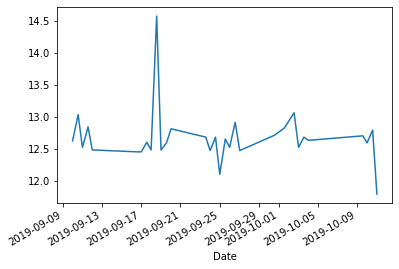

In [125]:
df['Distance'].plot.line();

- 누적 거리 시각화도 가능하다:

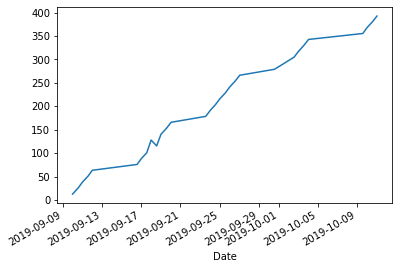

In [126]:
df['Distance'].cumsum().plot.line();

- 이들 시각화는 `matplotlib` 라이브러리를 써서 수행되는데,  
  다양한 설정 선택사항이 제공된다:

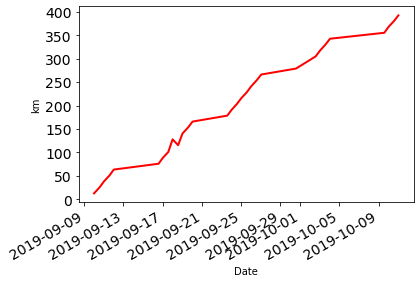

In [127]:
df['Distance'].cumsum().plot.line(fontsize=14, linewidth = 2, color = 'r', ylabel="km");

- 내장된 테마를 지정하여 풍부한 색상과 텍스트 형식을 시각화에 적용할 수 있다:

In [128]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

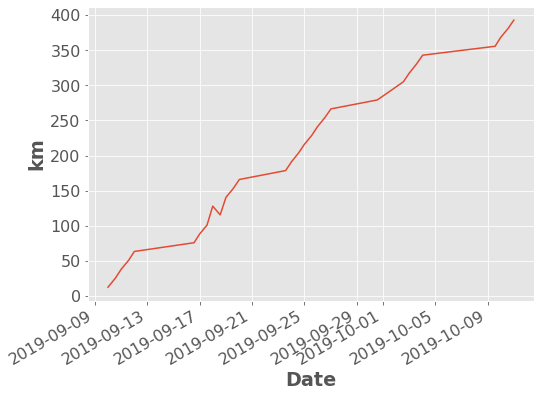

In [129]:
df['Distance'].dropna().cumsum().plot.line(ylabel="km");

- 자신만의 맞춤형 테마를 만드는 사람들도 있으며, 이런 것을 [사이버펑크 테마](https://github.com/dhaitz/mplcyberpunk)라고 한답니다:
  - 링크에서 제시한 설치 방법은 다음과 같다: `pip install mplcyberpunk` 
  - 먼저 콘다에서 설치를 시도해 보라: `conda install mplcyberpunk`
  - 채널을 추가 지정해서 다시 시도해 보라: `conda install -c conda-forge mplcyberpunk`
  - 이렇게 하고도 콘다에서 설치가 안된다면, 이는 `pip`로만 설치되는 것일 가능성이 높다. 
  - `pip`로 설치해도 아무런 문제는 없다.  
    

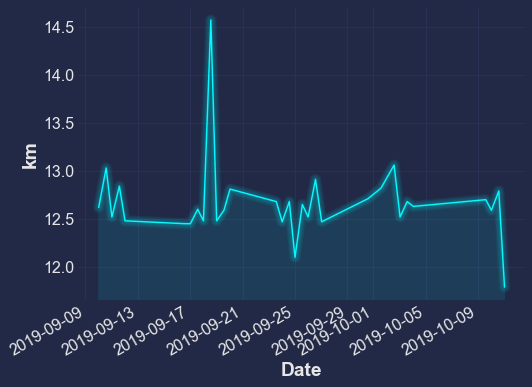

In [130]:
import mplcyberpunk
plt.style.use("cyberpunk")

df['Distance'].plot.line(ylabel="km")
mplcyberpunk.add_glow_effects()

- 적용 가능한 시각화 유형이 매우 다양하다: 

|메소드|시각화 유형|
|---|---|
|`bar` 또는 `barh` | 막대 그래프|
|`hist` | 히스토그램|
|`box` | 박스 플롯|
|`kde` 또는 `density` | 밀도 플롯|
|`area` | 면적 플롯|
|`scatter` | 산점도|
|`hexbin` | 육각형 지도|
|`pie` | 파이 차트|

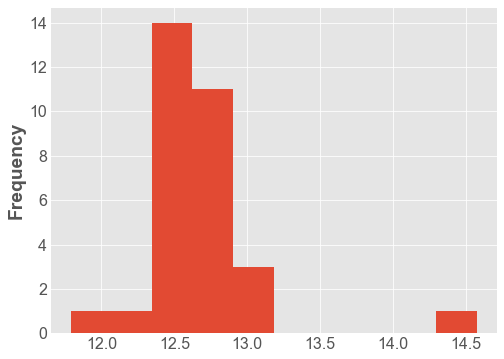

In [131]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})
df['Distance'].plot.hist();

- 아래 예제를 실행하기 전에 다음과 같이 모듈을 설치하라: `conda install scipy`

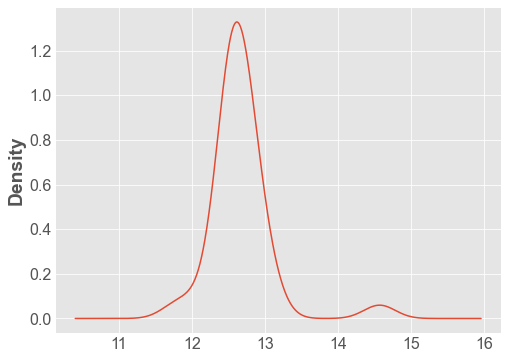

In [132]:
df['Distance'].plot.density();

- 4.1 항에서 단순 시각화를 공부했다. 
- 4.2 항에서 판다스 시각화를 공부하자. 
  
<div style="page-break-after: always;"></div> 

### 4.2 판다스 시각화

- 판다스도 상당히 다양한 시각화 함수를 `pandas.plotting` 모듈로 제공하고 있다.  
  - 데이터 사이언스 스쿨에서 제공하는 국문 문서 [Pandas의 시각화 기능](https://datascienceschool.net/01%20python/05.05%20%ED%8C%90%EB%8B%A4%EC%8A%A4%EC%9D%98%20%EC%8B%9C%EA%B0%81%ED%99%94%20%EA%B8%B0%EB%8A%A5.html)
  - 판다스에서 제공하는 영문 문서 [Pandas Plotting tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools)


In [133]:
from pandas.plotting import scatter_matrix

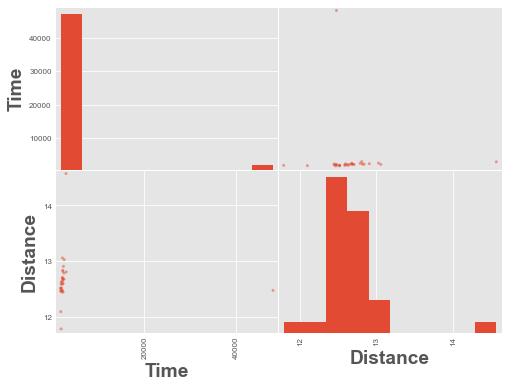

In [134]:
scatter_matrix(df);

- 자전거 출퇴근 데이터에서 시간 데이터에는 이상치가 포함되어 있다.  
  시간 수치에 등장하는 48,000을 초과하는 수치를 제거하고, 다시 시각화하자. 


In [135]:
df.query('Time > 4000')

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-19 00:30:01,Afternoon Ride,Ride,48062,12.48,Feeling good


In [136]:
df['Time'].dropna()[df['Time'] < 40000].mean()

2145.733333333333

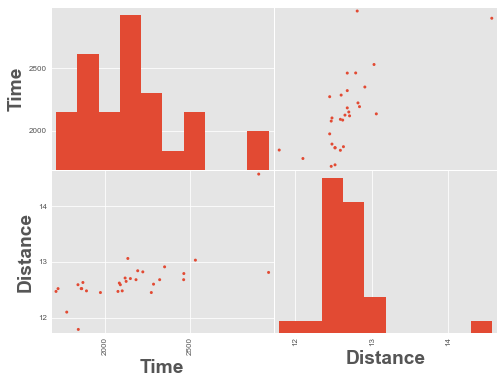

In [137]:
scatter_matrix(df.query('Time < 4000'), alpha=1);

- 4 절에서 데이터프레임 시각화를 공부했다. 
- 5 절에서 판다스 프로파일링을 공부하자. 
  
<div style="page-break-after: always;"></div> 

## 5. 판다스 프로파일링

- 판다스 프로파일링(profiling)은 요약 보고서를 생성하는 유용한 도구이다.   
  - 데이터프레임에 대한 **탐색적 데이터 분석(exploratory data analysis, EDA)**을 수행해 준다.
  - [Pandas profiling](https://github.com/pandas-profiling/pandas-profiling)은 기본적인 판다스에 포함되어 있지 않다.  
    아래 명령으로 추가적으로 설치할 수 있다: 
    ```
    pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
    ```

In [68]:
import pandas_profiling
df = pd.read_csv('../data/cycling_data.csv')
df.profile_report(progress_bar=False)

- 5 절 판다스 프로파일링을 공부했다. 

- 본 장에서는 "**데이터 정제 및 분석 응용**"을 공부했다. 
  - 문자열 작업
  - 날짜/시간 다루기
  - 계층적 인덱싱
  - 데이터프레임 시각화
  - 판다스 프로파일링

- 이상으로 "**데이터 과학을 위한 데이터 분석**" 강좌를 마무리한다.  
  - 실습 환경 준비
  - 넘파이
  - 판다스
  - 데이터 정제 및 분석 기본
  - 데이터 정제 및 분석 응용
  

- 학습 로드맵을 보면서 공부할 강좌를 고민하자. 

![](../img/00_roadmap.png)

<div style="page-break-after: always;"></div> 